In [1]:
## join tender type data to decision tree, and also include the visit frequency of members
## however, both are not used in the segmentation
### so still use the last version segmentation in 07

In [2]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
segment = pd.read_csv('all_member_segment.csv')
tender = pd.read_csv('member_join_tender.csv')
data = pd.merge(segment, tender, left_on = 'MEMBERSHIP_ID', right_on = 'MEMBERSHIP_ID', how = 'left')

In [4]:
X = data[:][['sales','num_item','autorenew_ind','payroll_deduct_ind','days_dif',
            'sum.Debit Card','sum.EBT Foodstamps','sum.Coupon']]
X['days_dif']=X['days_dif'].fillna(396)
X[['sum.Debit Card','sum.EBT Foodstamps','sum.Coupon']] = X[['sum.Debit Card','sum.EBT Foodstamps','sum.Coupon']].fillna(0)
X = X.fillna(X.mean())
Y = data['RENEW_IND']
X

,sales,num_item,autorenew_ind,payroll_deduct_ind,days_dif,sum.Debit Card,sum.EBT Foodstamps,sum.Coupon
0,2512.06,170,0,0,320.0,24292.94,13287.93,0.0
1,1281.95,45,0,0,43.0,12441.93,5327.45,0.0
2,142.25,13,0,0,152.0,1164.32,617.11,0.0
3,529.09,22,0,0,39.0,2065.62,0.00,0.0
4,420.31,26,0,0,192.0,2226.42,0.00,0.0
5,0.00,0,0,0,396.0,0.00,0.00,0.0
6,582.23,42,1,0,10.0,2293.81,160.96,240.0
7,609.23,28,0,0,56.0,3335.73,0.00,720.0
8,83.84,5,0,0,295.0,2082.50,0.00,0.0
9,927.61,61,0,0,54.0,679.42,655.09,0.0


In [5]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)

In [6]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=4, min_samples_leaf=1000)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1000, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [7]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os     

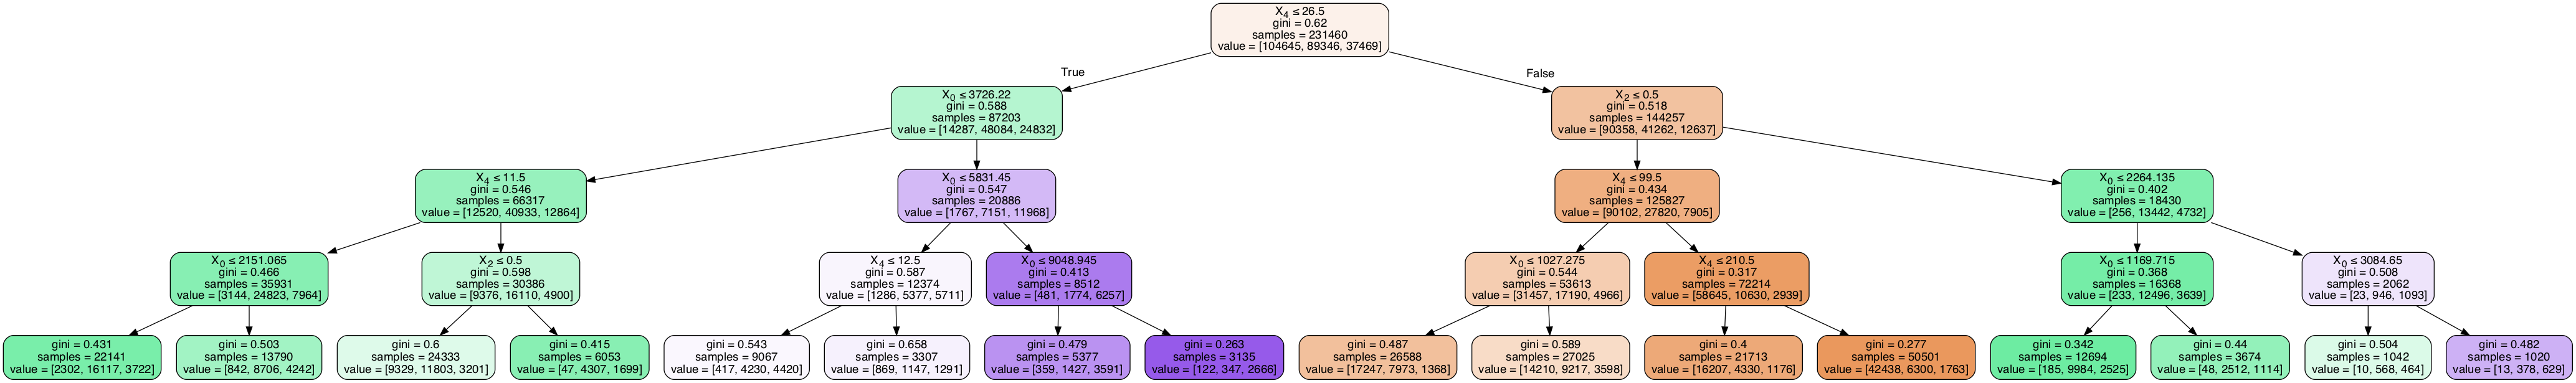

In [8]:
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [9]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=4, min_samples_leaf=1000)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1000, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

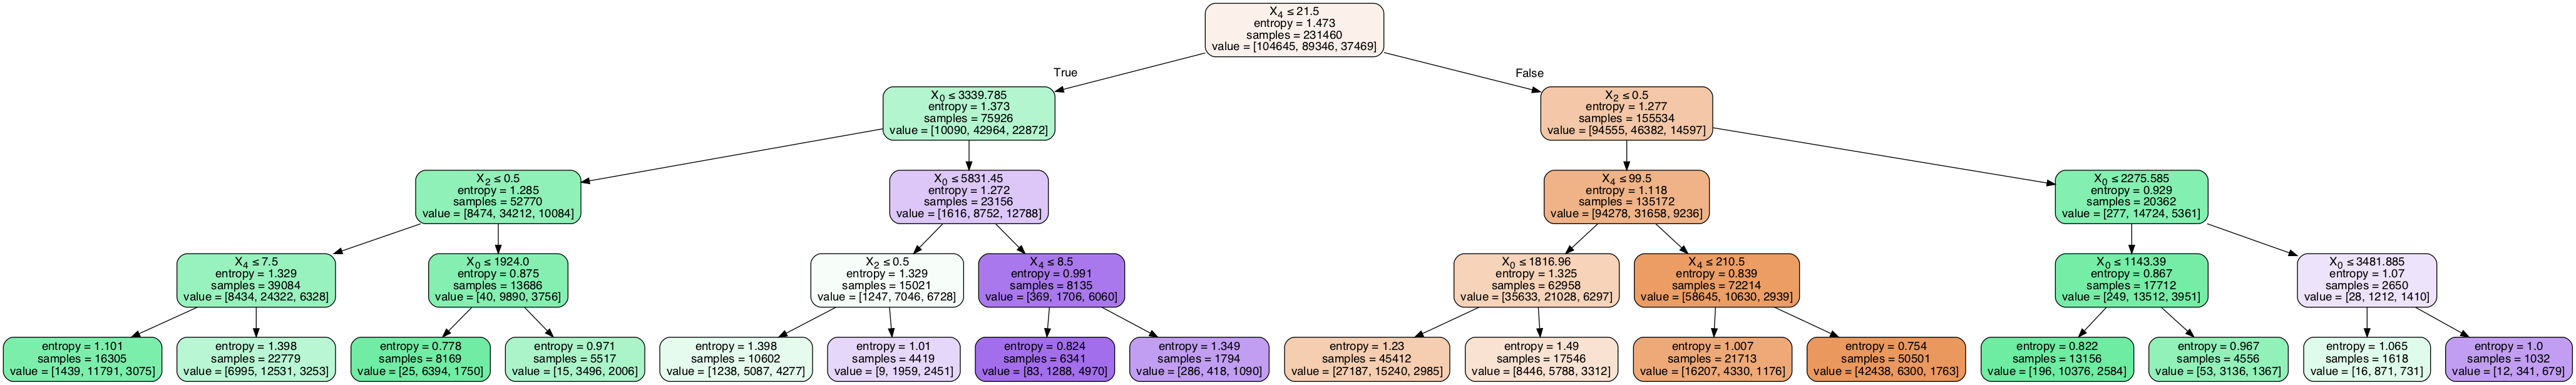

In [10]:
dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [11]:
y_pred = clf_gini.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 2])

In [12]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([1, 1, 0, ..., 0, 1, 2])

In [13]:
print ("Gini Accuracy is ", accuracy_score(y_test,y_pred)*100)

Gini Accuracy is  67.42936144474207


In [14]:
print ("Entropy Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

Entropy Accuracy is  67.44318672772833
